<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/6_BatchNormalization_Regularization/MNIST_Normalization_and_Regularization_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/regularization'
%cd $BASE_DIR
from utils import train, test, model,plot_metrics,helper,data_loader 
import torch

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt


!pip install torchsummary

/content/drive/MyDrive/regularization


## Set the seed for reproducibility

In [2]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)

cuda = torch.cuda.is_available()
if cuda:
    torch.cuda.manual_seed(SEED)

device = torch.device("cuda" if cuda else "cpu")


## Download data

In [3]:
train_transforms, test_transforms = data_loader.data_augmentation()
train,test = data_loader.download_mnist_data(train_transforms, test_transforms)

## Dataloader

In [4]:
BATCH_SIZE_GPU = 64
BATCH_SIZE_CPU = 64

dataloader_args = dict(shuffle=True, batch_size=BATCH_SIZE_GPU, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=BATCH_SIZE_CPU)
train_loader, test_loader = data_loader.dataloader(train, test,dataloader_args)

## Variable Initialization

In [5]:
exp_metrics={}
EPOCH=20
dropout=0.03

## Exp1 : LayerNorm with no regularization

In [6]:
experiment_name='LayerNorm'
norm_type='LN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,'LN',l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=0.16753773391246796 Batch_id=937 Accuracy=76.07: 100%|██████████| 938/938 [00:34<00:00, 27.43it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0983, Accuracy: 9798/10000 (97.98%)

Epoch 2:


Loss=0.048930685967206955 Batch_id=937 Accuracy=95.02: 100%|██████████| 938/938 [00:34<00:00, 27.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0659, Accuracy: 9814/10000 (98.14%)

Epoch 3:


Loss=0.12824203073978424 Batch_id=937 Accuracy=96.03: 100%|██████████| 938/938 [00:35<00:00, 26.57it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0449, Accuracy: 9861/10000 (98.61%)

Epoch 4:


Loss=0.005914160516113043 Batch_id=937 Accuracy=96.96: 100%|██████████| 938/938 [00:35<00:00, 26.54it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0292, Accuracy: 9914/10000 (99.14%)

Epoch 5:


Loss=0.045099642127752304 Batch_id=937 Accuracy=97.33: 100%|██████████| 938/938 [00:35<00:00, 26.41it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0383, Accuracy: 9885/10000 (98.85%)

Epoch 6:


Loss=0.020985238254070282 Batch_id=937 Accuracy=97.55: 100%|██████████| 938/938 [00:35<00:00, 26.34it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0300, Accuracy: 9904/10000 (99.04%)

Epoch 7:


Loss=0.07576802372932434 Batch_id=937 Accuracy=97.77: 100%|██████████| 938/938 [00:35<00:00, 26.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0259, Accuracy: 9924/10000 (99.24%)

Epoch 8:


Loss=0.0655752420425415 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:35<00:00, 26.50it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0325, Accuracy: 9919/10000 (99.19%)

Epoch 9:


Loss=0.013211281970143318 Batch_id=937 Accuracy=98.06: 100%|██████████| 938/938 [00:35<00:00, 26.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0263, Accuracy: 9928/10000 (99.28%)

Epoch 10:


Loss=0.1910584270954132 Batch_id=937 Accuracy=98.28: 100%|██████████| 938/938 [00:35<00:00, 26.47it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9925/10000 (99.25%)

Epoch 11:


Loss=0.07125009596347809 Batch_id=937 Accuracy=98.25: 100%|██████████| 938/938 [00:34<00:00, 26.81it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0192, Accuracy: 9945/10000 (99.45%)

Epoch 12:


Loss=0.0033862702548503876 Batch_id=937 Accuracy=98.30: 100%|██████████| 938/938 [00:34<00:00, 26.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0222, Accuracy: 9937/10000 (99.37%)

Epoch 13:


Loss=0.03373578563332558 Batch_id=937 Accuracy=98.44: 100%|██████████| 938/938 [00:34<00:00, 26.85it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 9935/10000 (99.35%)

Epoch 14:


Loss=0.047112904489040375 Batch_id=937 Accuracy=98.42: 100%|██████████| 938/938 [00:35<00:00, 26.63it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0212, Accuracy: 9939/10000 (99.39%)

Epoch 15:


Loss=0.0017520879628136754 Batch_id=937 Accuracy=98.48: 100%|██████████| 938/938 [00:34<00:00, 27.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0201, Accuracy: 9939/10000 (99.39%)

Epoch 16:


Loss=0.02361687272787094 Batch_id=937 Accuracy=98.63: 100%|██████████| 938/938 [00:35<00:00, 26.58it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0196, Accuracy: 9941/10000 (99.41%)

Epoch 17:


Loss=0.002222443697974086 Batch_id=937 Accuracy=98.75: 100%|██████████| 938/938 [00:34<00:00, 26.86it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0182, Accuracy: 9949/10000 (99.49%)

Epoch 18:


Loss=0.04913603886961937 Batch_id=937 Accuracy=98.77: 100%|██████████| 938/938 [00:35<00:00, 26.73it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 9950/10000 (99.50%)

Epoch 19:


Loss=0.015746593475341797 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:34<00:00, 27.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 9952/10000 (99.52%)

Epoch 20:


Loss=0.00797921884804964 Batch_id=937 Accuracy=98.87: 100%|██████████| 938/938 [00:35<00:00, 26.73it/s]



Test set: Average loss: 0.0163, Accuracy: 9955/10000 (99.55%)



## Missclassified Images for Exp1

Total wrong predictions are 45


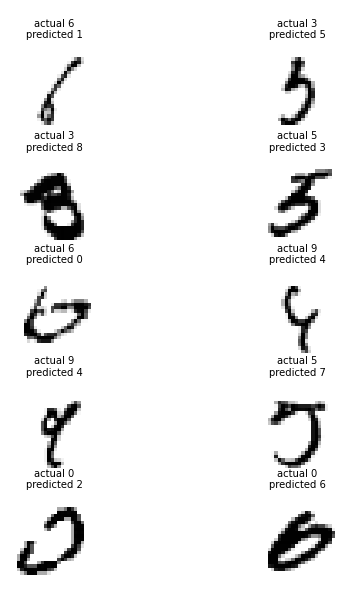

In [7]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp2 : GroupNorm with no regularization

In [8]:
experiment_name='GroupNorm'
norm_type='GN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=0.4097093343734741 Batch_id=937 Accuracy=60.12: 100%|██████████| 938/938 [00:34<00:00, 26.90it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.2604, Accuracy: 9409/10000 (94.09%)

Epoch 2:


Loss=0.09243262559175491 Batch_id=937 Accuracy=91.94: 100%|██████████| 938/938 [00:34<00:00, 27.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1259, Accuracy: 9668/10000 (96.68%)

Epoch 3:


Loss=0.2082943171262741 Batch_id=937 Accuracy=95.34: 100%|██████████| 938/938 [00:34<00:00, 26.98it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0522, Accuracy: 9852/10000 (98.52%)

Epoch 4:


Loss=0.03863728046417236 Batch_id=937 Accuracy=96.52: 100%|██████████| 938/938 [00:34<00:00, 27.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0391, Accuracy: 9880/10000 (98.80%)

Epoch 5:


Loss=0.05923836678266525 Batch_id=937 Accuracy=96.98: 100%|██████████| 938/938 [00:34<00:00, 26.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0513, Accuracy: 9838/10000 (98.38%)

Epoch 6:


Loss=0.24901974201202393 Batch_id=937 Accuracy=97.17: 100%|██████████| 938/938 [00:34<00:00, 27.16it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0394, Accuracy: 9879/10000 (98.79%)

Epoch 7:


Loss=0.03433084487915039 Batch_id=937 Accuracy=97.52: 100%|██████████| 938/938 [00:34<00:00, 27.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0309, Accuracy: 9895/10000 (98.95%)

Epoch 8:


Loss=0.025733500719070435 Batch_id=937 Accuracy=97.79: 100%|██████████| 938/938 [00:34<00:00, 27.31it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0291, Accuracy: 9916/10000 (99.16%)

Epoch 9:


Loss=0.00860457681119442 Batch_id=937 Accuracy=98.04: 100%|██████████| 938/938 [00:34<00:00, 26.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0322, Accuracy: 9905/10000 (99.05%)

Epoch 10:


Loss=0.10861268639564514 Batch_id=937 Accuracy=97.94: 100%|██████████| 938/938 [00:34<00:00, 26.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0268, Accuracy: 9916/10000 (99.16%)

Epoch 11:


Loss=0.045707181096076965 Batch_id=937 Accuracy=97.89: 100%|██████████| 938/938 [00:34<00:00, 27.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0217, Accuracy: 9933/10000 (99.33%)

Epoch 12:


Loss=0.08096516877412796 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [00:34<00:00, 27.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 9925/10000 (99.25%)

Epoch 13:


Loss=0.05346935987472534 Batch_id=937 Accuracy=98.21: 100%|██████████| 938/938 [00:34<00:00, 27.36it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0219, Accuracy: 9930/10000 (99.30%)

Epoch 14:


Loss=0.29144027829170227 Batch_id=937 Accuracy=98.25: 100%|██████████| 938/938 [00:34<00:00, 26.89it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9935/10000 (99.35%)

Epoch 15:


Loss=0.05550755187869072 Batch_id=937 Accuracy=98.51: 100%|██████████| 938/938 [00:34<00:00, 26.84it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9942/10000 (99.42%)

Epoch 16:


Loss=0.11106252670288086 Batch_id=937 Accuracy=98.50: 100%|██████████| 938/938 [00:34<00:00, 27.19it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9947/10000 (99.47%)

Epoch 17:


Loss=0.0023268633522093296 Batch_id=937 Accuracy=98.59: 100%|██████████| 938/938 [00:34<00:00, 27.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0171, Accuracy: 9952/10000 (99.52%)

Epoch 18:


Loss=0.16286616027355194 Batch_id=937 Accuracy=98.70: 100%|██████████| 938/938 [00:34<00:00, 27.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 9950/10000 (99.50%)

Epoch 19:


Loss=0.005002489313483238 Batch_id=937 Accuracy=98.78: 100%|██████████| 938/938 [00:34<00:00, 27.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 9950/10000 (99.50%)

Epoch 20:


Loss=0.040948960930109024 Batch_id=937 Accuracy=98.81: 100%|██████████| 938/938 [00:34<00:00, 27.19it/s]



Test set: Average loss: 0.0156, Accuracy: 9951/10000 (99.51%)



## Model Summary

In [9]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp2

Total wrong predictions are 49


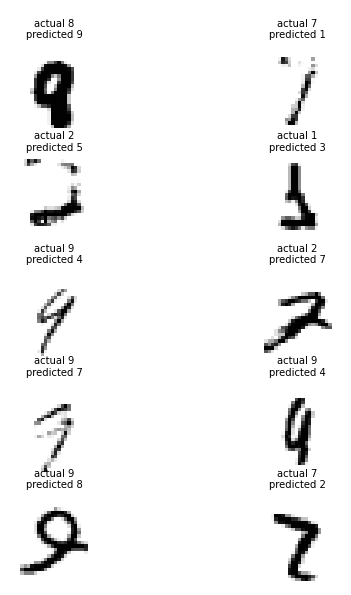

In [10]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp3 : BatchNorm with L1 regularization

In [11]:
experiment_name='BatchNorm+L1'
norm_type='BN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=0.7020387053489685 Batch_id=937 Accuracy=79.53: 100%|██████████| 938/938 [00:35<00:00, 26.15it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1069, Accuracy: 9740/10000 (97.40%)

Epoch 2:


Loss=0.6972419619560242 Batch_id=937 Accuracy=94.43: 100%|██████████| 938/938 [00:35<00:00, 26.26it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0784, Accuracy: 9761/10000 (97.61%)

Epoch 3:


Loss=0.42566925287246704 Batch_id=937 Accuracy=95.08: 100%|██████████| 938/938 [00:36<00:00, 25.72it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0552, Accuracy: 9822/10000 (98.22%)

Epoch 4:


Loss=0.7317333221435547 Batch_id=937 Accuracy=95.24: 100%|██████████| 938/938 [00:35<00:00, 26.20it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0913, Accuracy: 9728/10000 (97.28%)

Epoch 5:


Loss=0.5193902850151062 Batch_id=937 Accuracy=95.48: 100%|██████████| 938/938 [00:35<00:00, 26.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0555, Accuracy: 9832/10000 (98.32%)

Epoch 6:


Loss=0.49654272198677063 Batch_id=937 Accuracy=95.55: 100%|██████████| 938/938 [00:35<00:00, 26.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0757, Accuracy: 9774/10000 (97.74%)

Epoch 7:


Loss=0.4216751456260681 Batch_id=937 Accuracy=95.48: 100%|██████████| 938/938 [00:35<00:00, 26.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0437, Accuracy: 9868/10000 (98.68%)

Epoch 8:


Loss=0.38291263580322266 Batch_id=937 Accuracy=95.73: 100%|██████████| 938/938 [00:35<00:00, 26.32it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0591, Accuracy: 9820/10000 (98.20%)

Epoch 9:


Loss=0.5461230278015137 Batch_id=937 Accuracy=95.62: 100%|██████████| 938/938 [00:35<00:00, 26.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0589, Accuracy: 9827/10000 (98.27%)

Epoch 10:


Loss=0.45733124017715454 Batch_id=937 Accuracy=95.66: 100%|██████████| 938/938 [00:35<00:00, 26.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0671, Accuracy: 9793/10000 (97.93%)

Epoch 11:


Loss=0.9530124664306641 Batch_id=937 Accuracy=95.67: 100%|██████████| 938/938 [00:36<00:00, 25.98it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0573, Accuracy: 9811/10000 (98.11%)

Epoch 12:


Loss=0.3406940698623657 Batch_id=937 Accuracy=95.75: 100%|██████████| 938/938 [00:36<00:00, 26.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0511, Accuracy: 9853/10000 (98.53%)

Epoch 13:


Loss=0.46224454045295715 Batch_id=937 Accuracy=95.86: 100%|██████████| 938/938 [00:35<00:00, 26.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0819, Accuracy: 9748/10000 (97.48%)

Epoch 14:


Loss=0.4439828097820282 Batch_id=937 Accuracy=96.06: 100%|██████████| 938/938 [00:35<00:00, 26.45it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0562, Accuracy: 9828/10000 (98.28%)

Epoch 15:


Loss=0.49653303623199463 Batch_id=937 Accuracy=96.24: 100%|██████████| 938/938 [00:34<00:00, 26.83it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0537, Accuracy: 9834/10000 (98.34%)

Epoch 16:


Loss=0.29613059759140015 Batch_id=937 Accuracy=96.41: 100%|██████████| 938/938 [00:35<00:00, 26.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0395, Accuracy: 9886/10000 (98.86%)

Epoch 17:


Loss=0.5264511108398438 Batch_id=937 Accuracy=96.87: 100%|██████████| 938/938 [00:34<00:00, 26.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0406, Accuracy: 9870/10000 (98.70%)

Epoch 18:


Loss=0.26065370440483093 Batch_id=937 Accuracy=97.25: 100%|██████████| 938/938 [00:35<00:00, 26.78it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9916/10000 (99.16%)

Epoch 19:


Loss=0.2611393928527832 Batch_id=937 Accuracy=97.60: 100%|██████████| 938/938 [00:34<00:00, 26.80it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0246, Accuracy: 9926/10000 (99.26%)

Epoch 20:


Loss=0.2332051694393158 Batch_id=937 Accuracy=98.02: 100%|██████████| 938/938 [00:35<00:00, 26.61it/s]



Test set: Average loss: 0.0219, Accuracy: 9926/10000 (99.26%)



## Model Summary

In [12]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
       BatchNorm2d-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
      BatchNorm2d-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp3

Total wrong predictions are 74


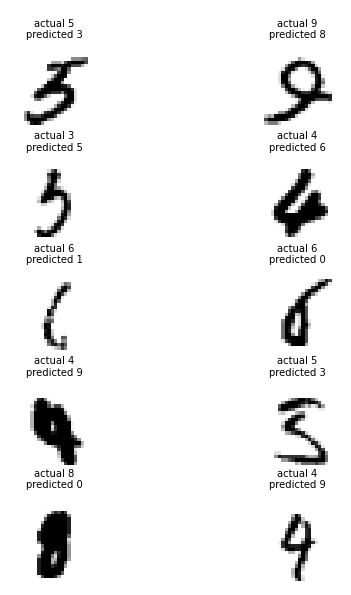

In [13]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp4 : GroupNorm with L1 regularization

In [14]:
experiment_name='GroupNorm+L1'
norm_type='GN'
l1_factor=0.001
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=1.0167300701141357 Batch_id=937 Accuracy=69.23: 100%|██████████| 938/938 [00:34<00:00, 27.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1994, Accuracy: 9603/10000 (96.03%)

Epoch 2:


Loss=0.8474695086479187 Batch_id=937 Accuracy=93.16: 100%|██████████| 938/938 [00:34<00:00, 27.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0862, Accuracy: 9791/10000 (97.91%)

Epoch 3:


Loss=1.0525469779968262 Batch_id=937 Accuracy=94.11: 100%|██████████| 938/938 [00:34<00:00, 26.97it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.2544, Accuracy: 9253/10000 (92.53%)

Epoch 4:


Loss=0.5243498086929321 Batch_id=937 Accuracy=94.84: 100%|██████████| 938/938 [00:34<00:00, 27.09it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0857, Accuracy: 9773/10000 (97.73%)

Epoch 5:


Loss=0.5950126051902771 Batch_id=937 Accuracy=95.08: 100%|██████████| 938/938 [00:34<00:00, 27.06it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0629, Accuracy: 9849/10000 (98.49%)

Epoch 6:


Loss=0.4406692683696747 Batch_id=937 Accuracy=95.25: 100%|██████████| 938/938 [00:34<00:00, 27.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0790, Accuracy: 9791/10000 (97.91%)

Epoch 7:


Loss=0.49274522066116333 Batch_id=937 Accuracy=95.29: 100%|██████████| 938/938 [00:34<00:00, 27.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0618, Accuracy: 9836/10000 (98.36%)

Epoch 8:


Loss=0.4545098543167114 Batch_id=937 Accuracy=95.35: 100%|██████████| 938/938 [00:34<00:00, 27.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0596, Accuracy: 9835/10000 (98.35%)

Epoch 9:


Loss=0.5534200668334961 Batch_id=937 Accuracy=95.36: 100%|██████████| 938/938 [00:34<00:00, 26.90it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0886, Accuracy: 9749/10000 (97.49%)

Epoch 10:


Loss=0.5654269456863403 Batch_id=937 Accuracy=95.43: 100%|██████████| 938/938 [00:34<00:00, 27.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0712, Accuracy: 9813/10000 (98.13%)

Epoch 11:


Loss=0.6952332854270935 Batch_id=937 Accuracy=95.70: 100%|██████████| 938/938 [00:34<00:00, 27.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0825, Accuracy: 9765/10000 (97.65%)

Epoch 12:


Loss=0.3959289789199829 Batch_id=937 Accuracy=95.74: 100%|██████████| 938/938 [00:34<00:00, 27.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0616, Accuracy: 9830/10000 (98.30%)

Epoch 13:


Loss=0.4120556116104126 Batch_id=937 Accuracy=95.75: 100%|██████████| 938/938 [00:34<00:00, 27.18it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0585, Accuracy: 9854/10000 (98.54%)

Epoch 14:


Loss=0.38251209259033203 Batch_id=937 Accuracy=96.00: 100%|██████████| 938/938 [00:34<00:00, 26.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0745, Accuracy: 9807/10000 (98.07%)

Epoch 15:


Loss=0.4609576165676117 Batch_id=937 Accuracy=96.02: 100%|██████████| 938/938 [00:34<00:00, 27.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0578, Accuracy: 9840/10000 (98.40%)

Epoch 16:


Loss=0.5611656904220581 Batch_id=937 Accuracy=96.43: 100%|██████████| 938/938 [00:34<00:00, 26.81it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0569, Accuracy: 9847/10000 (98.47%)

Epoch 17:


Loss=0.33418506383895874 Batch_id=937 Accuracy=96.88: 100%|██████████| 938/938 [00:34<00:00, 26.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0448, Accuracy: 9886/10000 (98.86%)

Epoch 18:


Loss=0.2752106487751007 Batch_id=937 Accuracy=97.49: 100%|██████████| 938/938 [00:34<00:00, 26.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0365, Accuracy: 9898/10000 (98.98%)

Epoch 19:


Loss=0.2852156162261963 Batch_id=937 Accuracy=97.91: 100%|██████████| 938/938 [00:34<00:00, 27.02it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0302, Accuracy: 9919/10000 (99.19%)

Epoch 20:


Loss=0.31744036078453064 Batch_id=937 Accuracy=98.14: 100%|██████████| 938/938 [00:34<00:00, 26.87it/s]



Test set: Average loss: 0.0283, Accuracy: 9932/10000 (99.32%)



## Model Summary

In [15]:
helper.model_summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
         GroupNorm-3            [-1, 8, 26, 26]              16
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
              ReLU-6           [-1, 16, 24, 24]               0
         GroupNorm-7           [-1, 16, 24, 24]              32
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
           Conv2d-11           [-1, 16, 10, 10]           1,152
             ReLU-12           [-1, 16, 10, 10]               0
        GroupNorm-13           [-1, 16, 10, 10]              32
          Dropout-14           [-1, 16,

## Missclassified Images for Exp4

Total wrong predictions are 68


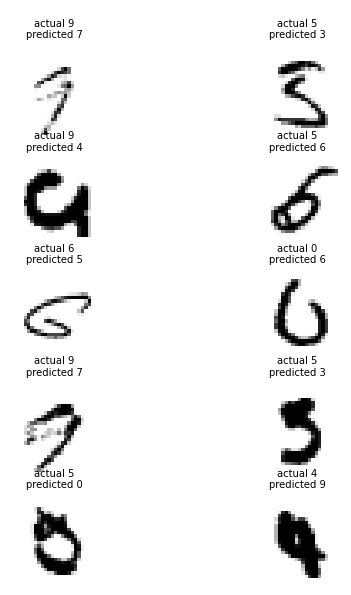

In [16]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp5 : LayerNorm with L2 regularization

In [17]:
experiment_name='LayerNorm+L2'
norm_type='LN'
l1_factor=0
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=0.14421147108078003 Batch_id=937 Accuracy=75.32: 100%|██████████| 938/938 [00:33<00:00, 28.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1256, Accuracy: 9724/10000 (97.24%)

Epoch 2:


Loss=0.09129173308610916 Batch_id=937 Accuracy=94.25: 100%|██████████| 938/938 [00:33<00:00, 28.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0548, Accuracy: 9856/10000 (98.56%)

Epoch 3:


Loss=0.06141551956534386 Batch_id=937 Accuracy=96.16: 100%|██████████| 938/938 [00:33<00:00, 28.07it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0472, Accuracy: 9866/10000 (98.66%)

Epoch 4:


Loss=0.10168309509754181 Batch_id=937 Accuracy=96.92: 100%|██████████| 938/938 [00:33<00:00, 28.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0476, Accuracy: 9864/10000 (98.64%)

Epoch 5:


Loss=0.03331560268998146 Batch_id=937 Accuracy=97.28: 100%|██████████| 938/938 [00:33<00:00, 27.79it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0452, Accuracy: 9887/10000 (98.87%)

Epoch 6:


Loss=0.04889463633298874 Batch_id=937 Accuracy=97.33: 100%|██████████| 938/938 [00:33<00:00, 28.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9891/10000 (98.91%)

Epoch 7:


Loss=0.08373671770095825 Batch_id=937 Accuracy=97.64: 100%|██████████| 938/938 [00:33<00:00, 28.13it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0290, Accuracy: 9925/10000 (99.25%)

Epoch 8:


Loss=0.17722679674625397 Batch_id=937 Accuracy=97.61: 100%|██████████| 938/938 [00:33<00:00, 28.17it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0337, Accuracy: 9903/10000 (99.03%)

Epoch 9:


Loss=0.06699152290821075 Batch_id=937 Accuracy=97.84: 100%|██████████| 938/938 [00:33<00:00, 28.11it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0326, Accuracy: 9904/10000 (99.04%)

Epoch 10:


Loss=0.020204627886414528 Batch_id=937 Accuracy=97.72: 100%|██████████| 938/938 [00:33<00:00, 28.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0347, Accuracy: 9911/10000 (99.11%)

Epoch 11:


Loss=0.025493357330560684 Batch_id=937 Accuracy=97.83: 100%|██████████| 938/938 [00:33<00:00, 28.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0395, Accuracy: 9893/10000 (98.93%)

Epoch 12:


Loss=0.008709524758160114 Batch_id=937 Accuracy=98.09: 100%|██████████| 938/938 [00:33<00:00, 27.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0287, Accuracy: 9927/10000 (99.27%)

Epoch 13:


Loss=0.09710272401571274 Batch_id=937 Accuracy=98.00: 100%|██████████| 938/938 [00:33<00:00, 28.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0311, Accuracy: 9917/10000 (99.17%)

Epoch 14:


Loss=0.025044960901141167 Batch_id=937 Accuracy=98.15: 100%|██████████| 938/938 [00:33<00:00, 27.96it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0271, Accuracy: 9928/10000 (99.28%)

Epoch 15:


Loss=0.060688793659210205 Batch_id=937 Accuracy=98.25: 100%|██████████| 938/938 [00:33<00:00, 27.76it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0276, Accuracy: 9923/10000 (99.23%)

Epoch 16:


Loss=0.005297655239701271 Batch_id=937 Accuracy=98.39: 100%|██████████| 938/938 [00:34<00:00, 27.03it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0232, Accuracy: 9942/10000 (99.42%)

Epoch 17:


Loss=0.03181358799338341 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [00:33<00:00, 28.05it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0228, Accuracy: 9935/10000 (99.35%)

Epoch 18:


Loss=0.013538511469960213 Batch_id=937 Accuracy=98.75: 100%|██████████| 938/938 [00:33<00:00, 28.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 9940/10000 (99.40%)

Epoch 19:


Loss=0.007583731319755316 Batch_id=937 Accuracy=98.86: 100%|██████████| 938/938 [00:33<00:00, 28.04it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0190, Accuracy: 9946/10000 (99.46%)

Epoch 20:


Loss=0.005742031615227461 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:34<00:00, 27.55it/s]



Test set: Average loss: 0.0184, Accuracy: 9948/10000 (99.48%)



## Missclassified Images for Exp5

---



Total wrong predictions are 52


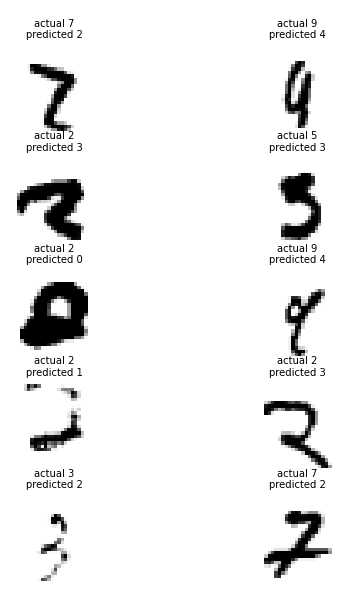

In [18]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp6 : BatchNorm with L1 and L2 regularization

In [19]:
experiment_name='BatchNorm+L1+L2'
norm_type='BN'
l1_factor=0.001
l2_factor=0.001
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=0.7577317953109741 Batch_id=937 Accuracy=80.28: 100%|██████████| 938/938 [00:35<00:00, 26.64it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1173, Accuracy: 9720/10000 (97.20%)

Epoch 2:


Loss=0.5695281028747559 Batch_id=937 Accuracy=93.78: 100%|██████████| 938/938 [00:35<00:00, 26.46it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0715, Accuracy: 9780/10000 (97.80%)

Epoch 3:


Loss=0.44048428535461426 Batch_id=937 Accuracy=94.90: 100%|██████████| 938/938 [00:35<00:00, 26.33it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0922, Accuracy: 9712/10000 (97.12%)

Epoch 4:


Loss=0.38482069969177246 Batch_id=937 Accuracy=95.03: 100%|██████████| 938/938 [00:34<00:00, 26.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0526, Accuracy: 9840/10000 (98.40%)

Epoch 5:


Loss=0.49552345275878906 Batch_id=937 Accuracy=95.19: 100%|██████████| 938/938 [00:35<00:00, 26.59it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0641, Accuracy: 9796/10000 (97.96%)

Epoch 6:


Loss=0.44641220569610596 Batch_id=937 Accuracy=95.20: 100%|██████████| 938/938 [00:35<00:00, 26.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0826, Accuracy: 9743/10000 (97.43%)

Epoch 7:


Loss=0.404509037733078 Batch_id=937 Accuracy=95.36: 100%|██████████| 938/938 [00:35<00:00, 26.60it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0498, Accuracy: 9842/10000 (98.42%)

Epoch 8:


Loss=0.38725727796554565 Batch_id=937 Accuracy=95.36: 100%|██████████| 938/938 [00:36<00:00, 25.44it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0808, Accuracy: 9761/10000 (97.61%)

Epoch 9:


Loss=0.5109426975250244 Batch_id=937 Accuracy=95.48: 100%|██████████| 938/938 [00:35<00:00, 26.56it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0632, Accuracy: 9793/10000 (97.93%)

Epoch 10:


Loss=0.3863784372806549 Batch_id=937 Accuracy=95.35: 100%|██████████| 938/938 [00:35<00:00, 26.78it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0803, Accuracy: 9747/10000 (97.47%)

Epoch 11:


Loss=0.5158900618553162 Batch_id=937 Accuracy=95.50: 100%|██████████| 938/938 [00:34<00:00, 26.92it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0590, Accuracy: 9822/10000 (98.22%)

Epoch 12:


Loss=0.5241356492042542 Batch_id=937 Accuracy=95.51: 100%|██████████| 938/938 [00:34<00:00, 26.87it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0587, Accuracy: 9829/10000 (98.29%)

Epoch 13:


Loss=0.3959522247314453 Batch_id=937 Accuracy=95.60: 100%|██████████| 938/938 [00:34<00:00, 26.93it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0644, Accuracy: 9807/10000 (98.07%)

Epoch 14:


Loss=0.3234027028083801 Batch_id=937 Accuracy=95.78: 100%|██████████| 938/938 [00:35<00:00, 26.79it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0600, Accuracy: 9839/10000 (98.39%)

Epoch 15:


Loss=0.47404414415359497 Batch_id=937 Accuracy=96.10: 100%|██████████| 938/938 [00:35<00:00, 26.78it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0535, Accuracy: 9834/10000 (98.34%)

Epoch 16:


Loss=0.4115751087665558 Batch_id=937 Accuracy=96.28: 100%|██████████| 938/938 [00:35<00:00, 26.79it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0379, Accuracy: 9885/10000 (98.85%)

Epoch 17:


Loss=0.2623322010040283 Batch_id=937 Accuracy=96.64: 100%|██████████| 938/938 [00:35<00:00, 26.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0417, Accuracy: 9881/10000 (98.81%)

Epoch 18:


Loss=0.2751762866973877 Batch_id=937 Accuracy=97.26: 100%|██████████| 938/938 [00:35<00:00, 26.77it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0303, Accuracy: 9899/10000 (98.99%)

Epoch 19:


Loss=0.23222848773002625 Batch_id=937 Accuracy=97.78: 100%|██████████| 938/938 [00:35<00:00, 26.71it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0240, Accuracy: 9924/10000 (99.24%)

Epoch 20:


Loss=0.42207199335098267 Batch_id=937 Accuracy=98.07: 100%|██████████| 938/938 [00:35<00:00, 26.78it/s]



Test set: Average loss: 0.0233, Accuracy: 9931/10000 (99.31%)



## Missclassified Images for Exp6

---



Total wrong predictions are 69


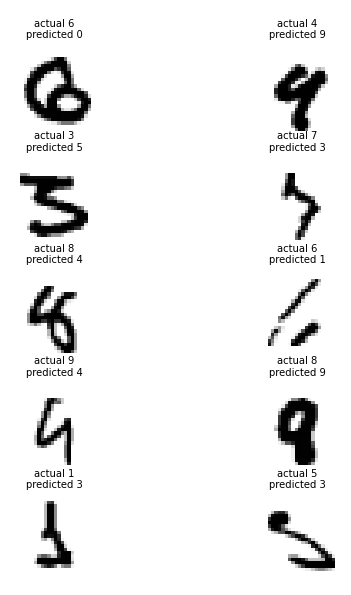

In [20]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Exp7 : BatchNorm with no regularization

In [21]:
experiment_name='BatchNorm'
norm_type='BN'
l1_factor=0
l2_factor=0
(exp_metrics[experiment_name]),model = helper.experiments(train_loader, test_loader,norm_type,l1_factor,l2_factor,dropout,EPOCH)
torch.save(model, './models/{}.pt'.format(experiment_name))

  0%|          | 0/938 [00:00<?, ?it/s]

Epoch 1:


Loss=0.22366976737976074 Batch_id=937 Accuracy=76.19: 100%|██████████| 938/938 [00:33<00:00, 28.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.1424, Accuracy: 9591/10000 (95.91%)

Epoch 2:


Loss=0.14199531078338623 Batch_id=937 Accuracy=94.07: 100%|██████████| 938/938 [00:33<00:00, 28.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0588, Accuracy: 9820/10000 (98.20%)

Epoch 3:


Loss=0.2716907262802124 Batch_id=937 Accuracy=95.83: 100%|██████████| 938/938 [00:33<00:00, 28.10it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0589, Accuracy: 9811/10000 (98.11%)

Epoch 4:


Loss=0.0943245068192482 Batch_id=937 Accuracy=96.43: 100%|██████████| 938/938 [00:33<00:00, 28.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0363, Accuracy: 9882/10000 (98.82%)

Epoch 5:


Loss=0.02006485126912594 Batch_id=937 Accuracy=97.07: 100%|██████████| 938/938 [00:33<00:00, 28.24it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0278, Accuracy: 9906/10000 (99.06%)

Epoch 6:


Loss=0.15125134587287903 Batch_id=937 Accuracy=97.29: 100%|██████████| 938/938 [00:33<00:00, 28.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0286, Accuracy: 9909/10000 (99.09%)

Epoch 7:


Loss=0.007151847239583731 Batch_id=937 Accuracy=97.60: 100%|██████████| 938/938 [00:33<00:00, 28.35it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0233, Accuracy: 9927/10000 (99.27%)

Epoch 8:


Loss=0.20800049602985382 Batch_id=937 Accuracy=97.62: 100%|██████████| 938/938 [00:33<00:00, 28.01it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0242, Accuracy: 9920/10000 (99.20%)

Epoch 9:


Loss=0.08816096931695938 Batch_id=937 Accuracy=97.71: 100%|██████████| 938/938 [00:33<00:00, 28.22it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0227, Accuracy: 9928/10000 (99.28%)

Epoch 10:


Loss=0.04457132890820503 Batch_id=937 Accuracy=97.93: 100%|██████████| 938/938 [00:33<00:00, 28.14it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0204, Accuracy: 9933/10000 (99.33%)

Epoch 11:


Loss=0.01144468504935503 Batch_id=937 Accuracy=98.04: 100%|██████████| 938/938 [00:33<00:00, 28.30it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0230, Accuracy: 9933/10000 (99.33%)

Epoch 12:


Loss=0.051553670316934586 Batch_id=937 Accuracy=98.01: 100%|██████████| 938/938 [00:33<00:00, 28.23it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9943/10000 (99.43%)

Epoch 13:


Loss=0.039300549775362015 Batch_id=937 Accuracy=98.15: 100%|██████████| 938/938 [00:33<00:00, 28.26it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0199, Accuracy: 9937/10000 (99.37%)

Epoch 14:


Loss=0.007060419302433729 Batch_id=937 Accuracy=98.19: 100%|██████████| 938/938 [00:33<00:00, 28.25it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0197, Accuracy: 9935/10000 (99.35%)

Epoch 15:


Loss=0.051842063665390015 Batch_id=937 Accuracy=98.27: 100%|██████████| 938/938 [00:33<00:00, 27.95it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0175, Accuracy: 9948/10000 (99.48%)

Epoch 16:


Loss=0.11147803068161011 Batch_id=937 Accuracy=98.38: 100%|██████████| 938/938 [00:33<00:00, 28.08it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0164, Accuracy: 9947/10000 (99.47%)

Epoch 17:


Loss=0.10825525224208832 Batch_id=937 Accuracy=98.43: 100%|██████████| 938/938 [00:33<00:00, 28.07it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0156, Accuracy: 9957/10000 (99.57%)

Epoch 18:


Loss=0.04189930483698845 Batch_id=937 Accuracy=98.49: 100%|██████████| 938/938 [00:33<00:00, 27.69it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0152, Accuracy: 9956/10000 (99.56%)

Epoch 19:


Loss=0.04981797933578491 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:34<00:00, 27.12it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0151, Accuracy: 9956/10000 (99.56%)

Epoch 20:


Loss=0.018318021669983864 Batch_id=937 Accuracy=98.58: 100%|██████████| 938/938 [00:34<00:00, 27.00it/s]



Test set: Average loss: 0.0151, Accuracy: 9955/10000 (99.55%)



## Missclassified Images for Exp7

---



Total wrong predictions are 45


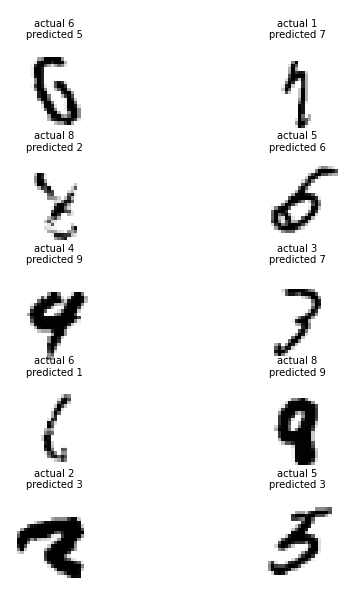

In [22]:
model = torch.load(f'./models/{experiment_name}.pt')
model.eval()
helper.wrong_predictions(test_loader,model,device)

## Plot Metrics for all Experiments

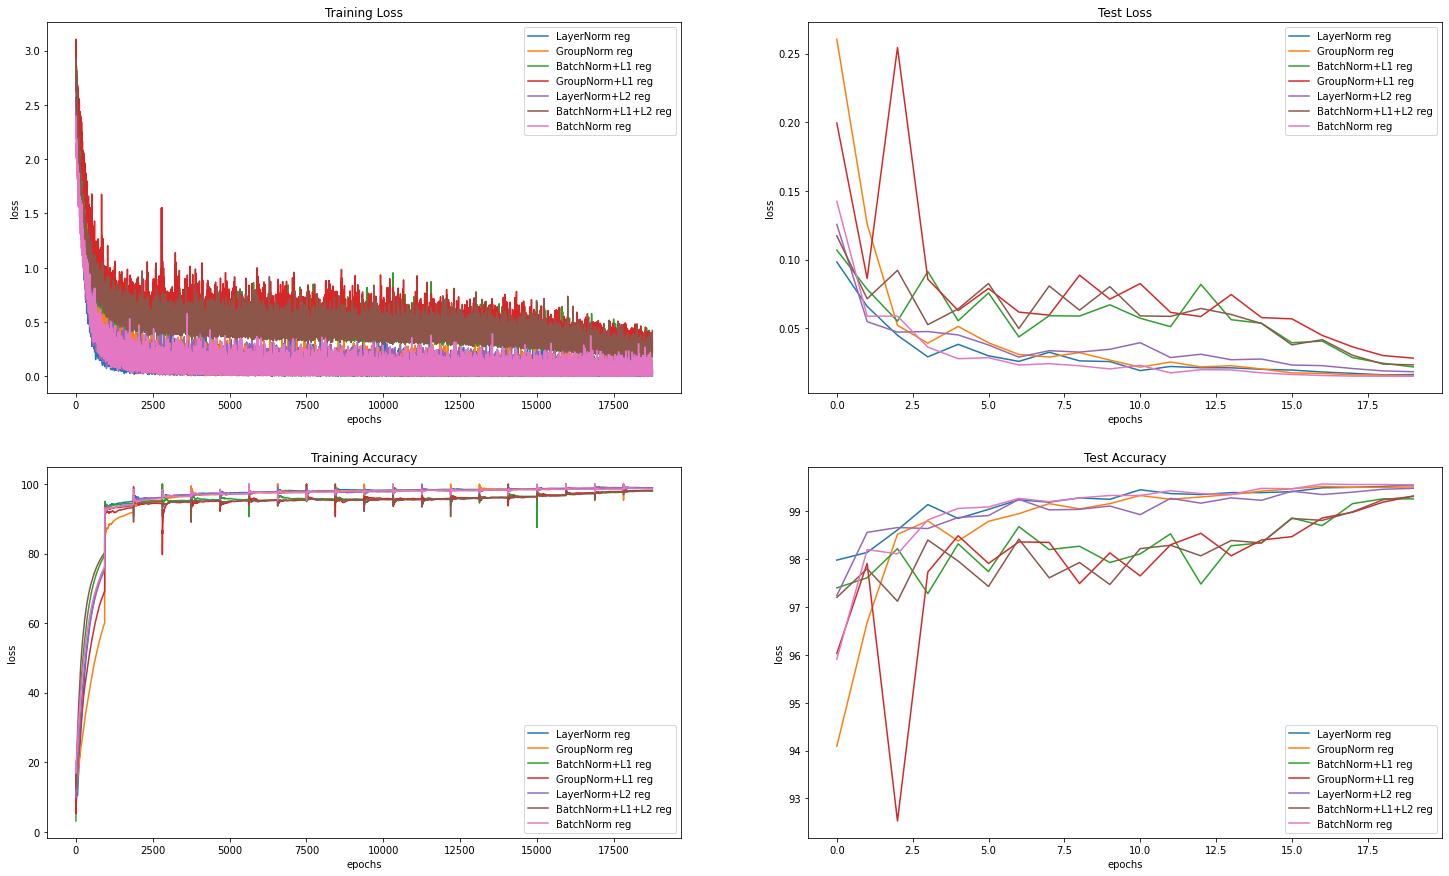

In [23]:
plot_metrics.plot_metrics(exp_metrics)